In [1]:
import predictor_of_investment_helper_methods as hm
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
case = "IEEE118_mod1"
nbc = 10

attribute_frames = dict()
attribute_frames["LB"] = pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}/3.Out/oT_LineBenefit_Data_{case}.csv").set_index("LoadLevel").sum(axis=1)
attribute_frames["CHI"]= pd.read_csv(f"L.Cont_Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_{case}.csv",header = [4]).set_index("LoadLevel").sum(axis=1)
attribute_frames["DHI"]= pd.read_csv(f"K.Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_{case}.csv",header = [4]).set_index("LoadLevel").sum(axis=1)

attribute_frames["LB_WoPCA"] = pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}/3.Out/oT_LineBenefit_Data_{case}.csv").set_index("LoadLevel").sum(axis=1)
attribute_frames["CHI_WoPCA"]= pd.read_csv(f"L.Cont_Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_{case}.csv",header = [4]).set_index("LoadLevel").sum(axis=1)
attribute_frames["DHI_WoPCA"]= pd.read_csv(f"K.Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_{case}.csv",header = [4]).set_index("LoadLevel").sum(axis=1)



In [19]:
#Define dictionary of frames with clustering info 

clustering_frames = dict()
clustering_frames["LB"] =pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["CHI"] =pd.read_csv(f"L.Cont_Investments_per_hour/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["DHI"] =pd.read_csv(f"K.Investments_per_hour/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")

clustering_frames["LB_WoPCA"] =pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}_ByStages_nc{nbc}/2.ParWoPCA/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["CHI_WoPCA"] =pd.read_csv(f"L.Cont_Investments_per_hour/{case}_ByStages_nc{nbc}/2.ParWoPCA/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["DHI_WoPCA"] =pd.read_csv(f"K.Investments_per_hour/{case}_ByStages_nc{nbc}/2.ParWoPCA/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")


# clustering_frames["RD"]["center"] = clustering_frames["RD"]["Stage"].map(stage_to_repr_load_level_map).map(repr_load_level_to_value_map)

cluster_names = clustering_frames["CHI"]["Stage"].unique()
color_map = plt.cm.get_cmap('viridis', len(cluster_names))
category_colors = {category: color_map(i) for i, category in enumerate(cluster_names)}


C:\Users\u0138303\AppData\Local\Temp\ipykernel_22320\2190915873.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(cluster_names))


In [20]:
load_level_to_stage_map = dict()
stage_to_repr_load_level_map =dict()
repr_load_level_to_value_map =dict()
for cm in ["CHI","DHI","LB","CHI_WoPCA","DHI_WoPCA","LB_WoPCA"]: 
    
    load_level_to_stage_map[cm] = clustering_frames[cm]["Stage"].to_dict()

    stage_to_repr_load_level_map[cm] = clustering_frames[cm][clustering_frames[cm]["Duration"] == 1].set_index("Stage")["LoadLevel"].to_dict()
    repr_load_level_to_value_map[cm] = {ll: attribute_frames[cm].loc[ll] for ll in stage_to_repr_load_level_map[cm].values()}
    centers = clustering_frames[cm]["center"] = clustering_frames[cm]["Stage"].map(stage_to_repr_load_level_map[cm]).map(repr_load_level_to_value_map[cm])
    min_val = centers.min()
    max_val = centers.max()
    clustering_frames[cm]["center"] = (centers - min_val) / (max_val - min_val)



In [21]:
clustering_frames["LB"]["color"] = clustering_frames["LB"]["Stage"].map(category_colors)
clustering_frames["CHI"]["color"] = clustering_frames["CHI"]["Stage"].map(category_colors)
clustering_frames["DHI"]["color"] = clustering_frames["DHI"]["Stage"].map(category_colors)

clustering_frames["LB_WoPCA"]["color"] = clustering_frames["LB_WoPCA"]["Stage"].map(category_colors)
clustering_frames["CHI_WoPCA"]["color"] = clustering_frames["CHI_WoPCA"]["Stage"].map(category_colors)
clustering_frames["DHI_WoPCA"]["color"] = clustering_frames["DHI_WoPCA"]["Stage"].map(category_colors)

C:\Users\u0138303\AppData\Local\Temp\ipykernel_22320\639049137.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


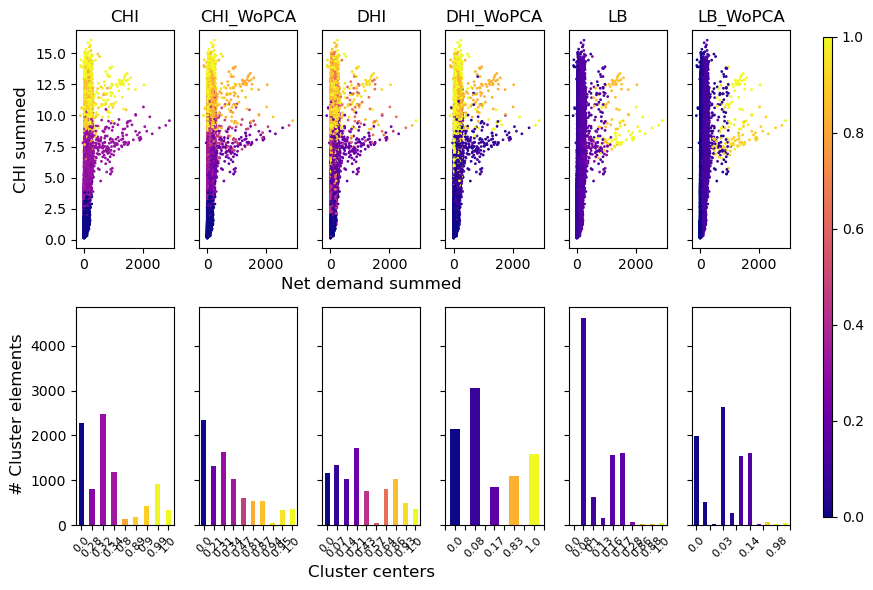

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

scaler = 0.75
fig, axs = plt.subplots(2, 6, figsize=(12*scaler, 8*scaler), sharey="row")

# Cluster names to loop through
cluster_names = ["CHI","CHI_WoPCA","DHI","DHI_WoPCA","LB","LB_WoPCA"]
x = "LB"
y = "CHI"
s = 1

# Custom colormap
cmap = plt.get_cmap("plasma")

# Loop over the cluster names to create scatter plots and bar plots
for i, cluster in enumerate(cluster_names):
    # Scatter plot in the first row
    centers = clustering_frames[cluster]["center"]
    scatter = axs[0, i].scatter(x=attribute_frames[x], y=attribute_frames[y], c=centers, s=s, cmap=cmap)
    axs[0, i].set_title(f"{cluster}")

    # Normalize the values for consistent coloring
    norm = mpl.colors.Normalize(vmin=centers.min(), vmax=centers.max())

    # Bar plot in the second row (center_rounded)
    clustering_frames[cluster]["center"] = centers.round(2)
    value_counts = clustering_frames[cluster]["center"].value_counts().sort_index()

    # Get colors for each unique value in the bar plot
    bar_colors = cmap(norm(value_counts.index))

    # Plot the bar plot with corresponding colors
    value_counts.plot(kind='bar', ax=axs[1, i], color=bar_colors)
    #axs[1, i].set_title(f"{cluster} value counts")
    #axs[1, i].set_xlabel("Center Values (rounded)")
    axs[1, i].set_ylabel(" # Cluster elements",fontsize = 12)
    axs[1, i].set_xlabel("")

    # Limit the number of x-ticks to avoid overlap
    axs[1, i].xaxis.set_major_locator(MaxNLocator(nbins=10))  # Show a maximum of 5 ticks
    axs[1, i].tick_params(axis='x', rotation=45,labelsize = 8)

# Set labels for the first row (scatter plots)
axs[0, 0].set_ylabel("CHI summed",fontsize = 12)
#axs[0, 0].set_ylabel("OC",fontsize = 12)
axs[0, 2].set_xlabel("Net demand summed",fontsize = 12)
axs[1, 2].set_xlabel("Cluster centers",fontsize = 12)

# Add a single colorbar for all scatter plots spanning both rows
l=0.2
cbar_ax = fig.add_axes([0.92, l/2+0.03, 0.01,1-l])  # Adjust the position (left, bottom, width, height)
cbar = fig.colorbar(scatter, cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
#plt.savefig(f"Z.Figures/ClustersVisual/Clustering_{case}_nc{nbc}_Dims_{x}_{y}.png",dpi=500)
plt.show()
